In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [3]:
datagen=ImageDataGenerator(
    rescale=1./255,
    )

In [4]:
test_dataset_path = 'C:\\Users\\Sam\\Downloads\\Compressed\\TEST'
train_dataset_path = 'C:\\Users\\Sam\\yoga classification\\train'

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 793 images belonging to 5 classes.


In [6]:
valid_generator=train_datagen.flow_from_directory(
    train_dataset_path,
   target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 195 images belonging to 5 classes.


In [7]:
test_generator = datagen.flow_from_directory(
    test_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 470 images belonging to 5 classes.


In [8]:
# images,labels=train_generator.next()

In [9]:
# print(f'Image shape is {images.shape}')

In [10]:
# print(f'label shape is {labels.shape}')

**Converting Images valus to dataframe for analysis**

In [11]:
# images_array=images

In [12]:
import numpy as np
import seaborn as sns

In [13]:
# images_df = pd.DataFrame(images_array.reshape(images_array.shape[0], -1))

In [14]:
# classes=list(train_generator.class_indices.keys())

In [15]:
# original_class_names = [classes[i] for i in np.argmax(labels, axis=1)]

# Convert the original class names to a pandas DataFrame
# labels_df = pd.DataFrame(original_class_names, columns=['class'])

In [16]:
# Concatenating images and labels DataFrames horizontally
# df = pd.concat([images_df, labels_df], axis=1)

In [17]:
# df.head()

In [18]:
# sns.histplot(data=df,kde=True)

**Creating a CNN model**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout

In [63]:
model=Sequential()
#convolutional layer
model.add(Conv2D(32,(3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

#flatten layer
model.add(Flatten())

#fully connected layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 10

#early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fitting the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
    callbacks=[early_stopping]
)


Epoch 1/10
25/25 [==============================] - 31s 1s/step - loss: 1.6242 - accuracy: 0.2409 - val_loss: 1.4085 - val_accuracy: 0.6462
Epoch 2/10
25/25 [==============================] - 25s 1s/step - loss: 1.2889 - accuracy: 0.4880 - val_loss: 0.7377 - val_accuracy: 0.7641
Epoch 3/10
25/25 [==============================] - 23s 907ms/step - loss: 0.9297 - accuracy: 0.6494 - val_loss: 0.5554 - val_accuracy: 0.7692
Epoch 4/10
25/25 [==============================] - 22s 894ms/step - loss: 0.7147 - accuracy: 0.7339 - val_loss: 0.3843 - val_accuracy: 0.8821
Epoch 5/10
25/25 [==============================] - 21s 846ms/step - loss: 0.5819 - accuracy: 0.7881 - val_loss: 0.3325 - val_accuracy: 0.8769
Epoch 6/10
25/25 [==============================] - 22s 856ms/step - loss: 0.4788 - accuracy: 0.8121 - val_loss: 0.3155 - val_accuracy: 0.8821
Epoch 7/10
25/25 [==============================] - 20s 790ms/step - loss: 0.3648 - accuracy: 0.8739 - val_loss: 0.2903 - val_accuracy: 0.9026
Epoch

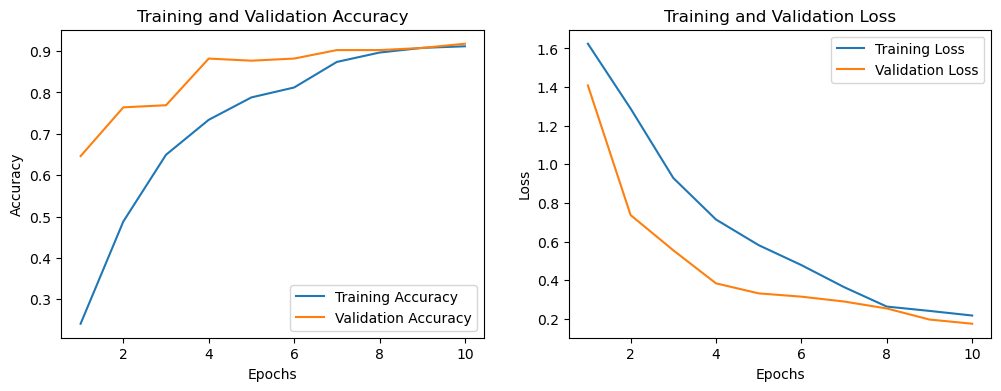

In [79]:
import matplotlib.pyplot as plt

#training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

#training and validation loss
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

#epochs range
epochs_range = range(1, len(training_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [87]:
loss,validation_accuracy= model.evaluate(valid_generator, steps=len(valid_generator))

7/7 [==============================] - 1s 149ms/step - loss: 0.1754 - accuracy: 0.9179


In [90]:
test_accuracy = model.evaluate(test_generator, steps=len(test_generator), verbose=1)[1]
print("Test Accuracy:", test_accuracy)

15/15 [==============================] - 19s 1s/step - loss: 0.7252 - accuracy: 0.8404
Test Accuracy: 0.8404255509376526


In [91]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [92]:
import seaborn as sns

15/15 [==============================] - 20s 1s/step


<Axes: >

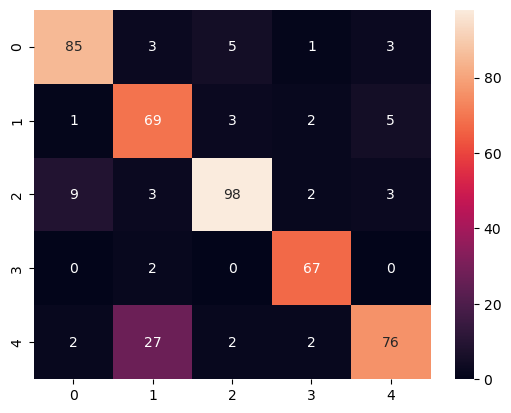

In [93]:
test_predicted_labels=test_generator.classes
test_predicted_labels=np.argmax(model.predict(test_generator),axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_predicted_labels)
sns.heatmap(conf_matrix,annot=True)

In [94]:
from sklearn.metrics import classification_report

In [95]:
cr=classification_report(test_true_labels, test_predicted_labels)

In [96]:
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        97
           1       0.66      0.86      0.75        80
           2       0.91      0.85      0.88       115
           3       0.91      0.97      0.94        69
           4       0.87      0.70      0.78       109

    accuracy                           0.84       470
   macro avg       0.85      0.85      0.84       470
weighted avg       0.85      0.84      0.84       470



**Predictions on unseen data**

In [75]:
model.save('yoga_posses_final.keras')

In [97]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 36ms/step


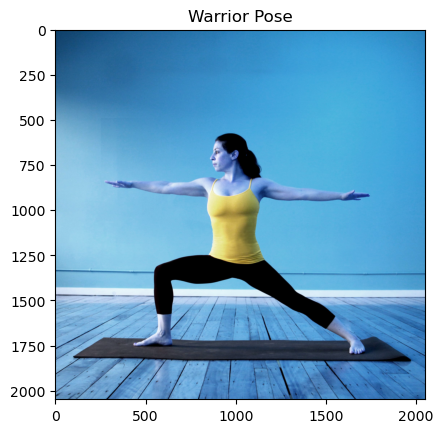

In [98]:
image=cv.imread('C:\\Users\\Sam\\Downloads\\Compressed\\TEST\\warrior2\\00000002.jpg')
resized_image=cv.resize(image,(150,150))
scaled_image=(resized_image/255)
reshaped_img=scaled_image.reshape(1,150,150,3)
prediction=np.argmax(model.predict(reshaped_img))
if prediction ==0:
  predicted_class='Downdog Pose'
elif prediction==1:
  predicted_class='Goddes Pose'
elif prediction==2:
  predicted_class='Plank Pose'
elif prediction==3:
  predicted_class='Tree Pose'
elif prediction==4:
  predicted_class='Warrior Pose'
plt.imshow(image);
plt.title(predicted_class);
